In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# 1.Data Ingestion:

In [2]:
day_df = pd.read_csv('day.csv')

In [3]:
hr_df = pd.read_csv('hour.csv')

In [4]:
print(hr_df.shape, day_df.shape)

(17379, 17) (731, 16)


In [5]:
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hr_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [11]:
hr_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# day_df.info()

In [13]:
# day_df.describe().T

In [14]:
# day_df.isnull().sum()

In [15]:
# plt.figure(figsize=(15,10))
# sns.heatmap(day_df.corr(), annot=True, cmap='BrBG');

# 2. Split Data set:

In [16]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
x = hr_df.drop(['cnt','dteday','casual','registered'], axis = 1 )

In [18]:
y = hr_df.cnt

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12165, 13), (5214, 13), (12165,), (5214,))

In [22]:
from sklearn.metrics import r2_score

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
LR = LinearRegression()

In [25]:
LR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
LR_prid = LR.predict(x_test)

In [27]:
LR.score(x_train, y_train)

0.3900075187049705

In [28]:
LR.score(x_test, y_test)

0.38570305709117786

In [29]:
r2_score(y_test, LR_prid)

0.3857030570911779

# 3. Build a base model:

In [30]:
import statsmodels.api as sms

In [31]:
constant = sms.add_constant(x)

D:\program\python\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [32]:
model = sms.OLS(y,constant).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     850.0
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        02:38:40   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17365   BIC:                         2.217e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.1261      7.464     -3.768      0.000     -42.757     -13.495
instant       -0.0050      0.005     -0.974      0.330      -0.015       0.005
season        19.8735      1.819     10.926      0.000      16.308      23.439
yr           124.7725     44.903      2.779      0.005      36.758     212.787
mnth           3.6300      3.778      0.961      0.337      -3.776      11.036
hr             7.6773      0.165     46.513      0.000       7.354       8.001
holiday      -21.9269      6.695     -3.275      0.001     -35.049      -8.805
weekday        1.8786      0.541      3.474      0.001       0.819       2.938
workingday     3.9492      2.396      1.648      0.099      -0.747       8.645
weathersit    -3.4696      1.905     -1.821      0.069      -7.204       0.264
temp          79.6821     36.991      2.154      0.031       7.176     152.188
atemp        231.4135     41.556      5.569      0.000     149.960     312.867
hum         -197.9664      6.892    -28.723      0.000    -211.476    -184.457
windspeed     41.6277      9.629      4.323      0.000      22.754      60.501
==============================================================================
Omnibus:                     3419.583   Durbin-Watson:                   0.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6666.296
Skew:                           1.198   Prob(JB):                         0.00
Kurtosis:                       4.861   Cond. No.                     5.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 4. EDA -  Plots:

In [34]:
# hr_df = pd.read_csv('hour.csv')

In [35]:
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [36]:
hr_df.drop('instant', axis=1, inplace=True)

In [37]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [38]:
# plt.figure(figsize=(15,10))
# for i, col in enumerate(hr_df.select_dtypes(exclude=object).columns):
#     plt.subplot(5, 3, i+1)
#     plt.title(col)
#     sns.boxplot(hr_df[col])

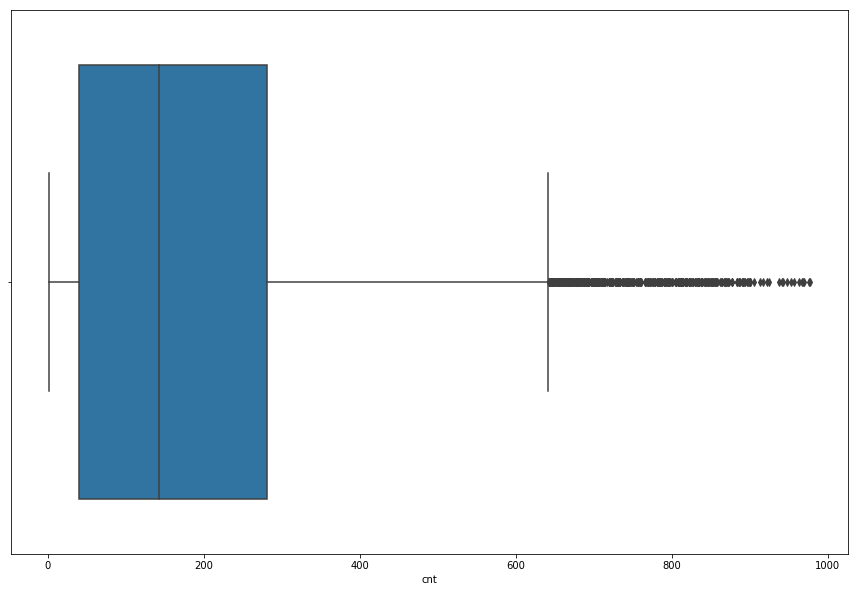

In [39]:
plt.figure(figsize=(15,10))
sns.boxplot(hr_df['cnt'])

In [40]:
hr_df.cnt.describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [41]:
q1 = 40
q2 = 142
q3 = 281

In [42]:
IQR = q3 - q1
upper_wisker = q3 + 1.5 * IQR
lower_wisker = q1 - 1.5 * IQR

In [43]:
print(upper_wisker, lower_wisker)

print(hr_df[hr_df.cnt > upper_wisker].shape)

print(hr_df[hr_df.cnt < lower_wisker].shape)

642.5 -321.5
(505, 16)
(0, 16)


In [44]:
505/hr_df.cnt.count()

0.029058058576442832

In [45]:
IQR = q3 - q1
upper_wisker = q3 + 3 * IQR
lower_wisker = q1 - 3 * IQR

In [46]:
print(upper_wisker, lower_wisker)

print(hr_df[hr_df.cnt > upper_wisker].shape)

print(hr_df[hr_df.cnt < lower_wisker].shape)

1004 -683
(0, 16)
(0, 16)


### B.Apply correlation plot and display with color code and numerical indication

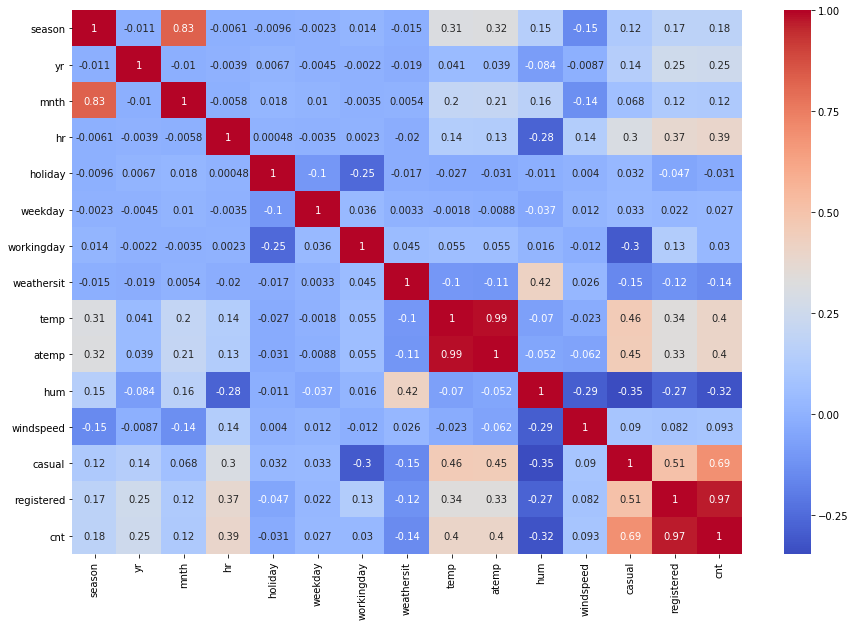

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(hr_df.corr(), annot=True, cmap='coolwarm');

### C.Plot best X with Y and find how the Y is varying with X. Like if X is continuous, go for scatter plot. if X is categorical, go for box plot.

In [48]:
# hr_df['dteday'] = pd.to_datetime(hr_df['dteday'],format='%Y-%m-%d', yearfirst=True)
hr_df['dteday'] = hr_df['dteday'].astype('category')

In [49]:
hr_df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [50]:
hr_df['season'] = hr_df['season'].astype('category')

In [51]:
hr_df['yr'].unique()

array([0, 1], dtype=int64)

In [52]:
hr_df['yr'] = hr_df['yr'].astype('category')

In [53]:
hr_df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [54]:
hr_df['mnth'] = hr_df['mnth'].astype('category')

In [55]:
hr_df['holiday'].unique()

array([0, 1], dtype=int64)

In [56]:
hr_df['holiday'] = hr_df['holiday'].astype('category')

In [57]:
hr_df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [58]:
hr_df['weekday'] = hr_df['weekday'].astype('category')

In [59]:
hr_df['workingday'].unique()

array([0, 1], dtype=int64)

In [60]:
hr_df['workingday'] = hr_df['workingday'].astype('category')

In [61]:
hr_df['weathersit'].unique()

array([1, 2, 3, 4], dtype=int64)

In [62]:
hr_df['weathersit'] = hr_df['weathersit'].astype('category')

In [63]:
hr_df['hr'].unique()

hr_df['hr'] = hr_df['hr'].astype('category')

In [64]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
dteday        17379 non-null category
season        17379 non-null category
yr            17379 non-null category
mnth          17379 non-null category
hr            17379 non-null category
holiday       17379 non-null category
weekday       17379 non-null category
workingday    17379 non-null category
weathersit    17379 non-null category
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: category(9), float64(4), int64(3)
memory usage: 1.1 MB


In [65]:
hr_df.select_dtypes('category').columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit'],
      dtype='object')

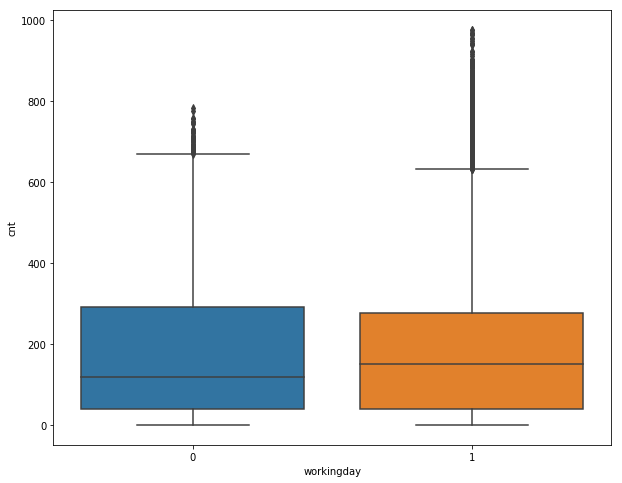

In [66]:
# if day is neither weekend nor holiday is 1, otherwise is 0.
plt.figure(figsize=(10,8))
sns.boxplot(x['workingday'], y)

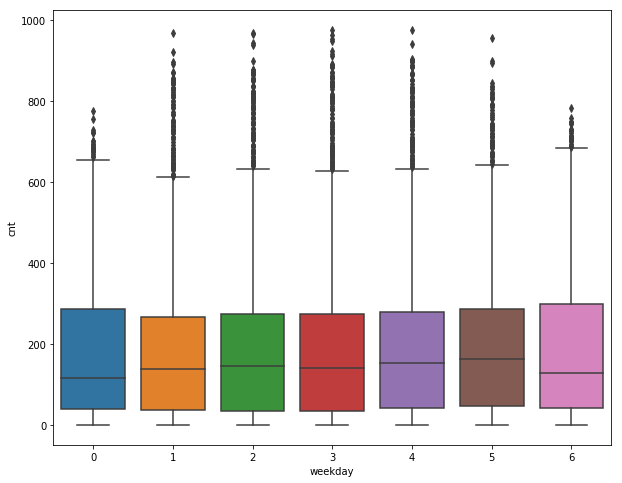

In [67]:
# day of the week
plt.figure(figsize=(10,8))
sns.boxplot(x['weekday'], y)

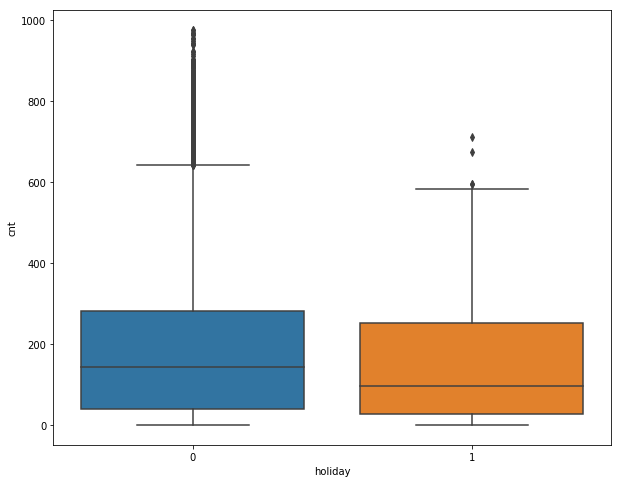

In [68]:
# weather day is holiday or not
plt.figure(figsize=(10,8))
sns.boxplot(x['holiday'], y)

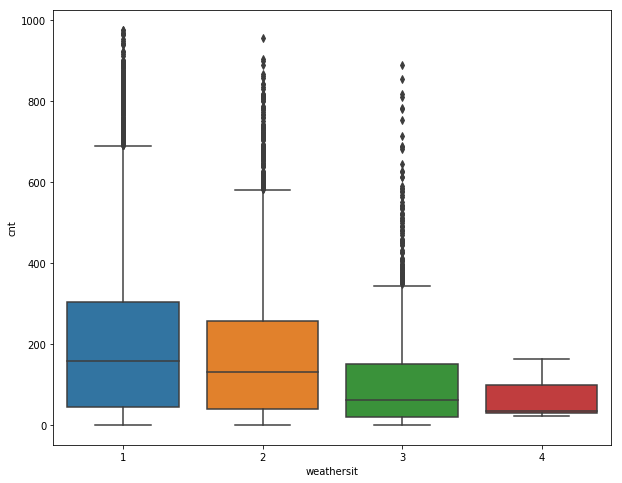

In [69]:
# weathersit :
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
plt.figure(figsize=(10,8))
sns.boxplot(x['weathersit'], y)

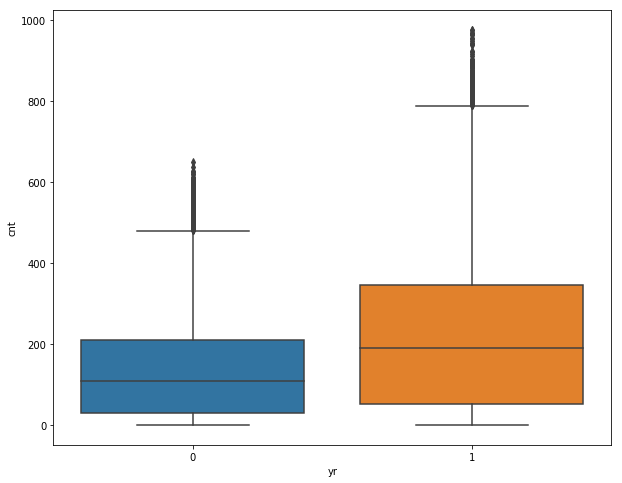

In [70]:
plt.figure(figsize=(10,8))
sns.boxplot(x['yr'], y)

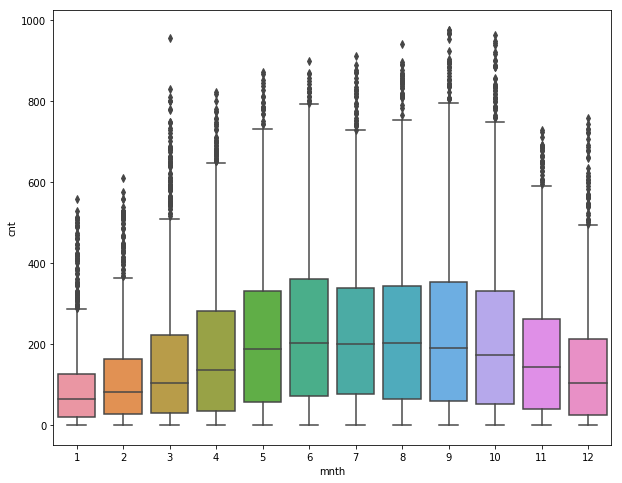

In [71]:
plt.figure(figsize=(10,8))
sns.boxplot(x['mnth'], y)

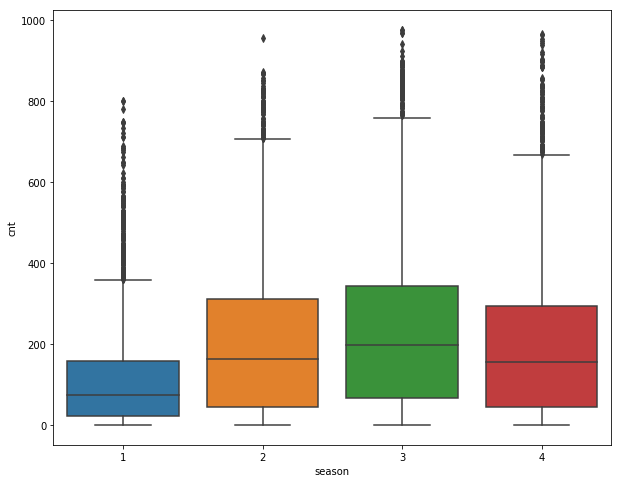

In [72]:
plt.figure(figsize=(10,8))
sns.boxplot(x['season'], y)

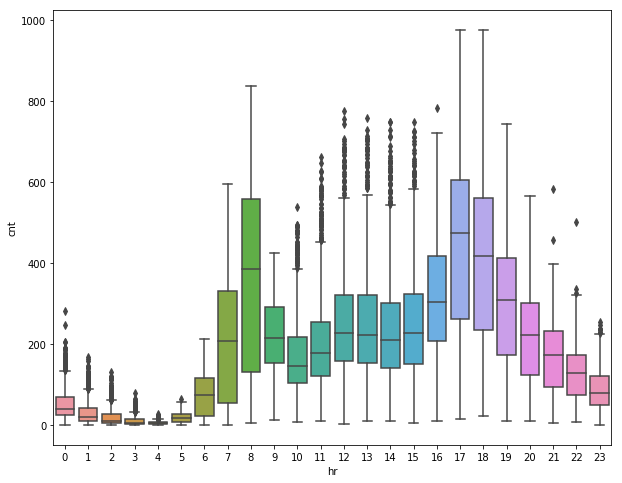

In [73]:
# hour (0 to 23)
plt.figure(figsize=(10,8))
sns.boxplot(x['hr'], y)

In [74]:
hr_df.select_dtypes(exclude='category').columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

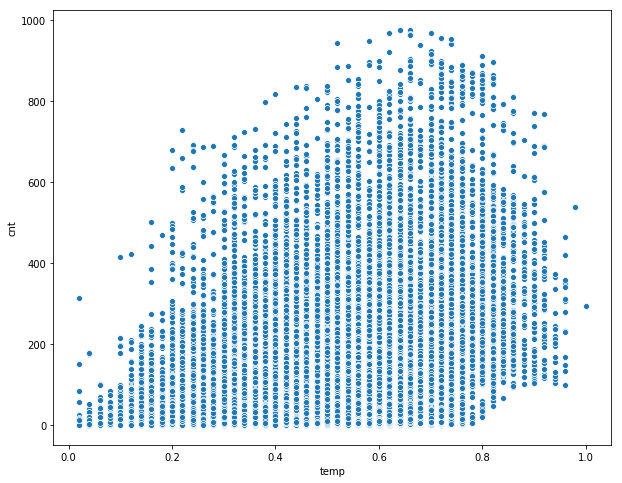

In [75]:
# Normalized temperature in Celsius.
plt.figure(figsize=(10,8))
sns.scatterplot(x['temp'], y)

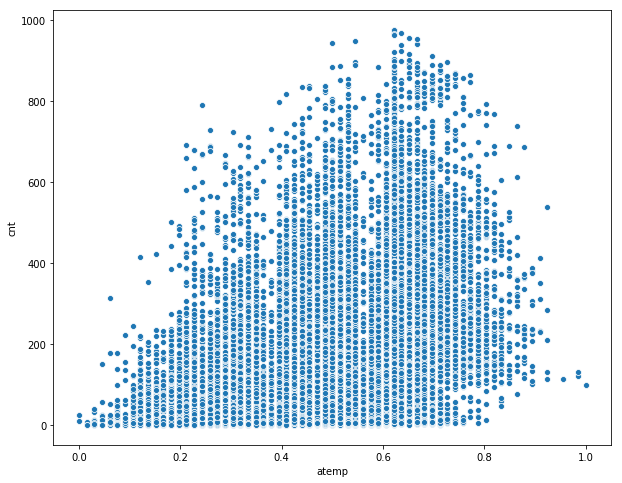

In [76]:
# Normalized feeling temperature in Celsius
plt.figure(figsize=(10,8))
sns.scatterplot(x['atemp'], y)

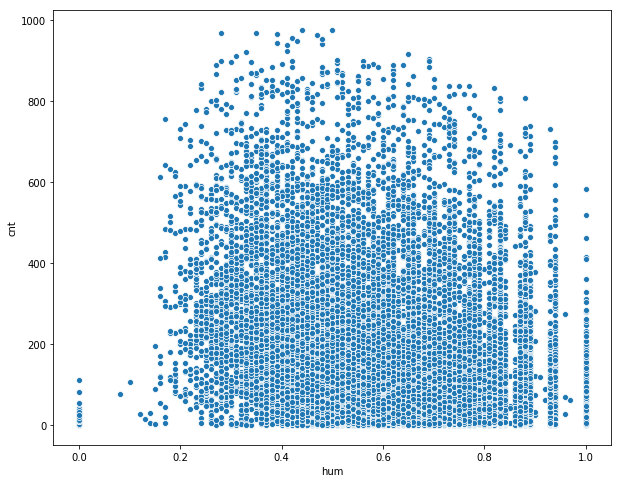

In [77]:
plt.figure(figsize=(10,8))
sns.scatterplot(x['hum'], y)

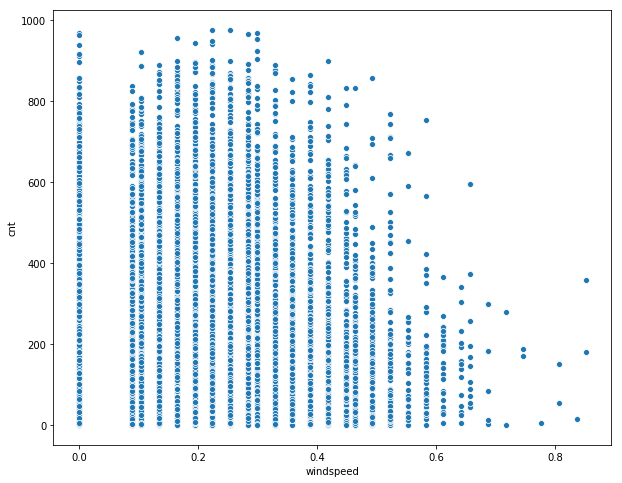

In [78]:
plt.figure(figsize=(10,8))
sns.scatterplot(x['windspeed'], y)

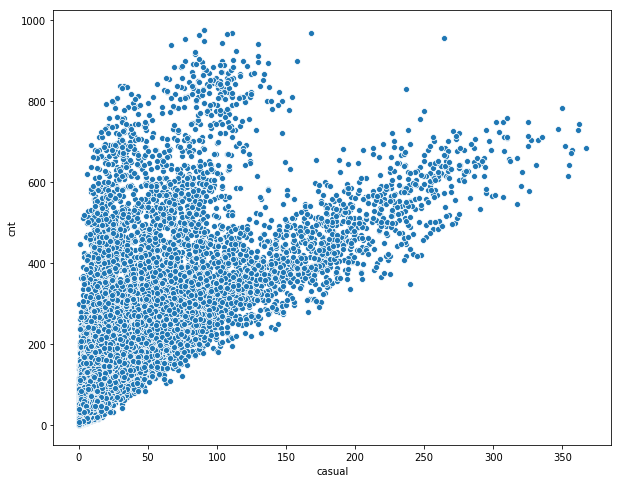

In [79]:
plt.figure(figsize=(10,8))
sns.scatterplot(hr_df['casual'], y)

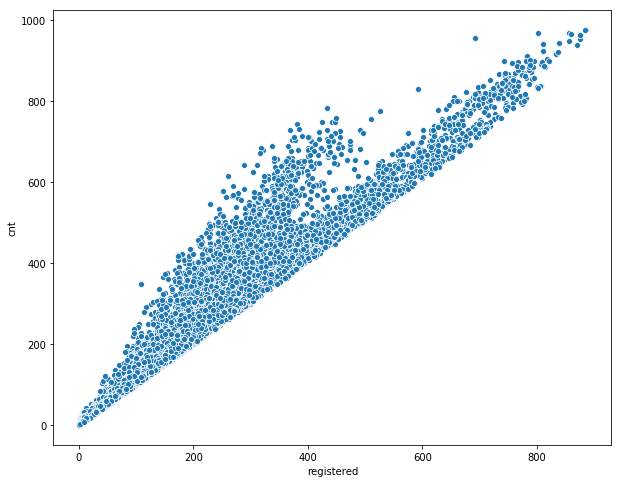

In [80]:
plt.figure(figsize=(10,8))
sns.scatterplot(hr_df['registered'], y)

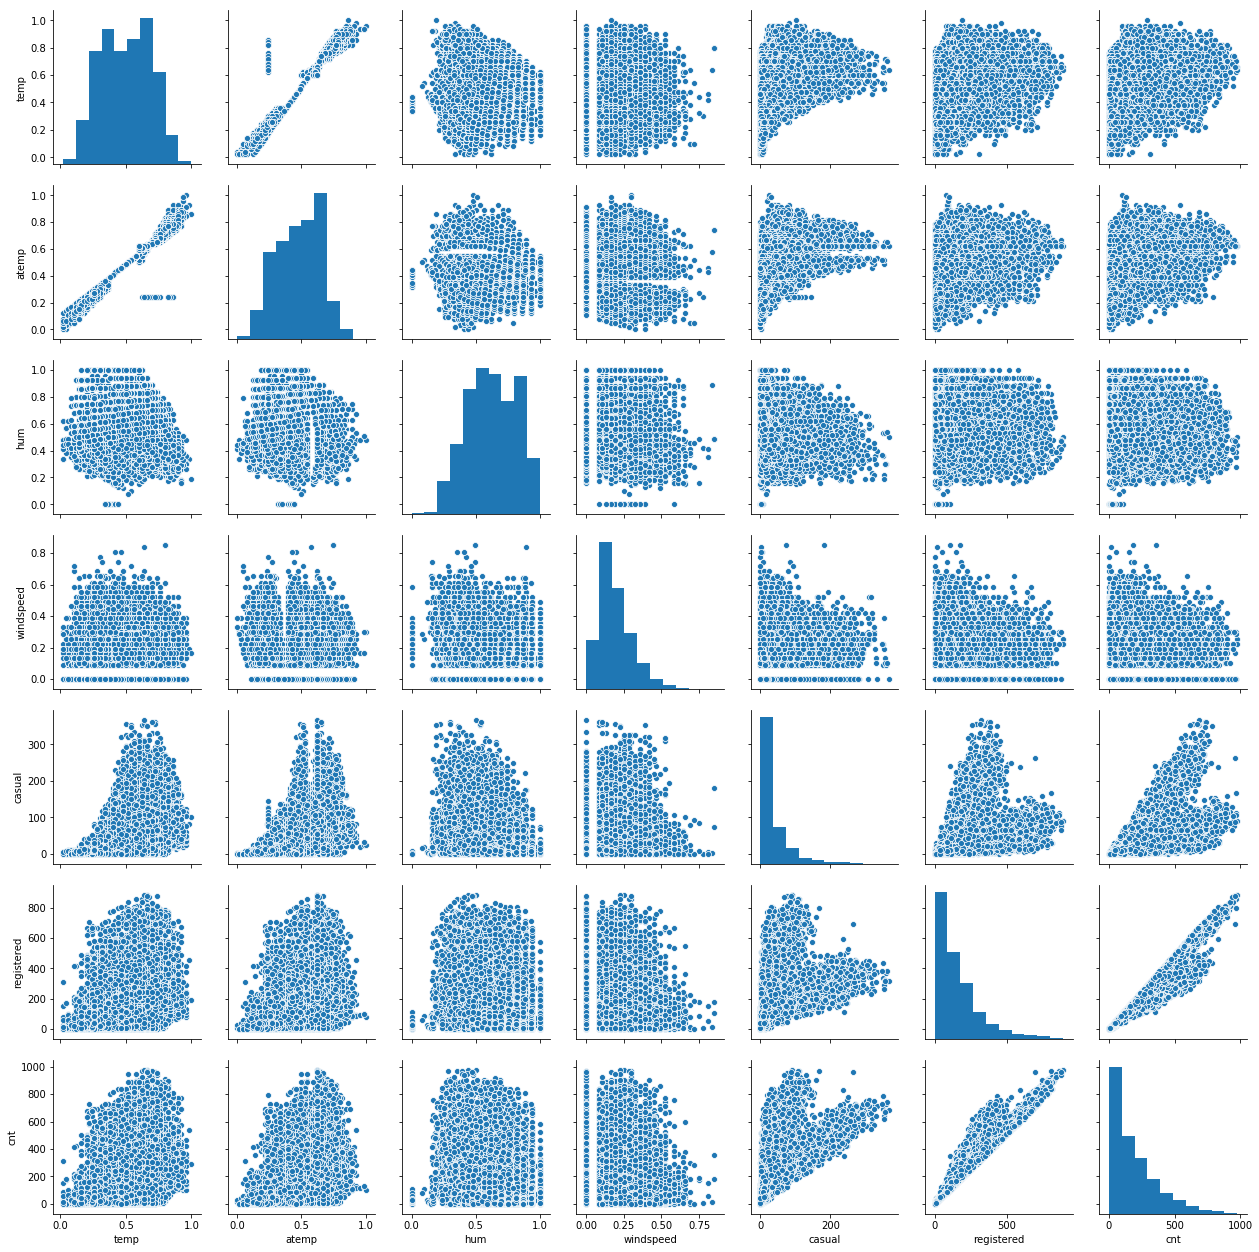

In [81]:
sns.pairplot(hr_df.select_dtypes(exclude='category'))

### C. Apply density plot and check if the data is normally distributed

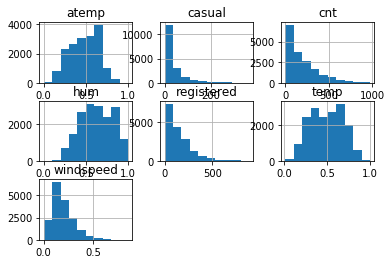

In [82]:
hr_df.hist();

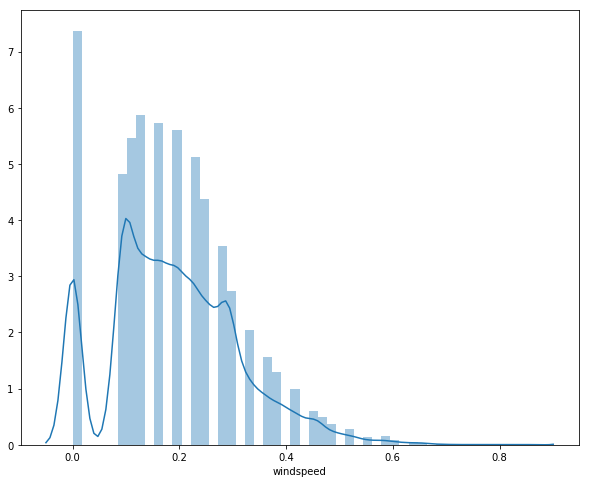

In [83]:
plt.figure(figsize=(10,8))
sns.distplot(hr_df['windspeed']);

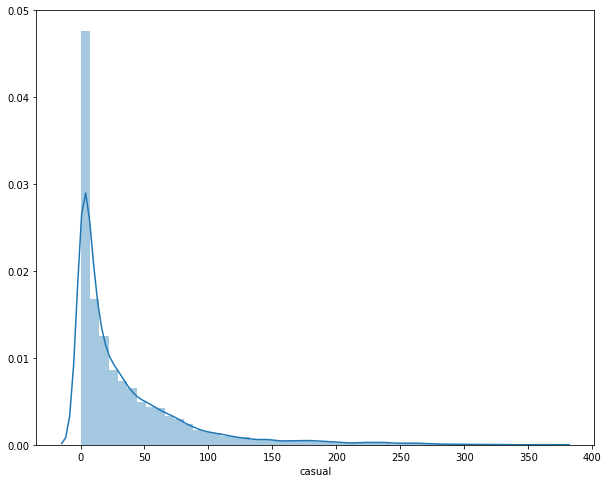

In [84]:
plt.figure(figsize=(10,8))
sns.distplot(hr_df['casual']);

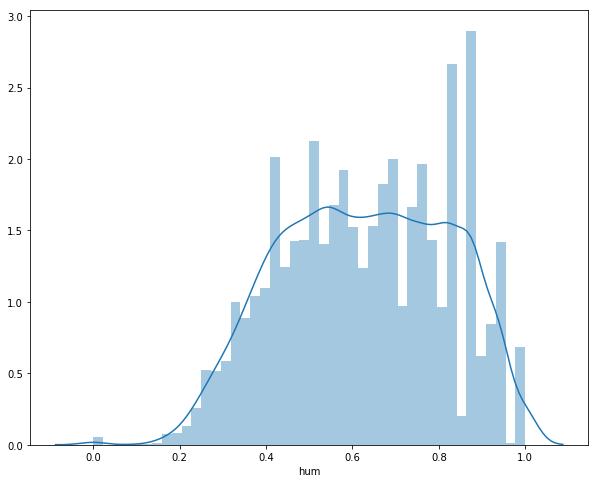

In [85]:
plt.figure(figsize=(10,8))
sns.distplot(hr_df['hum']);

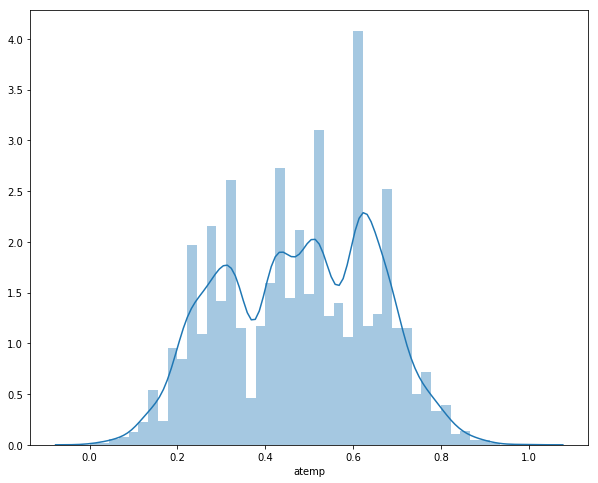

In [86]:
plt.figure(figsize=(10,8))
sns.distplot(hr_df['atemp']);

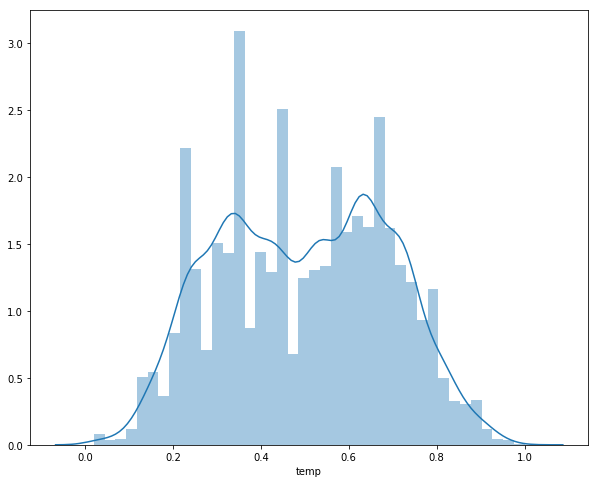

In [87]:
plt.figure(figsize=(10,8))
sns.distplot(hr_df['temp']);

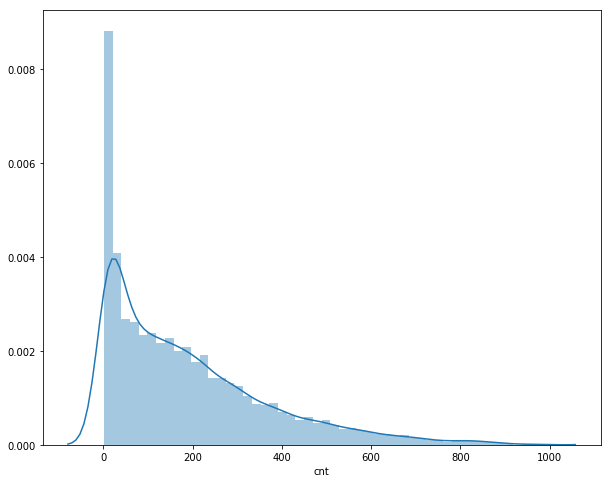

In [88]:
plt.figure(figsize=(10,8))
sns.distplot(hr_df['cnt']);

# 5. EDA - Inference:

# 6. Multi Collinearity Check:

In [89]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
dteday        17379 non-null category
season        17379 non-null category
yr            17379 non-null category
mnth          17379 non-null category
hr            17379 non-null category
holiday       17379 non-null category
weekday       17379 non-null category
workingday    17379 non-null category
weathersit    17379 non-null category
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: category(9), float64(4), int64(3)
memory usage: 1.1 MB


In [90]:
hr_df.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


In [91]:
# From pearson correlation

In [92]:
cor = hr_df.corr()

In [93]:
cor['cnt']

temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [94]:
cor[np.abs(cor['cnt'])>0.4].index

Index(['temp', 'atemp', 'casual', 'registered', 'cnt'], dtype='object')

In [95]:
hr_df[['casual', 'registered']].corr()

,casual,registered
casual,1.000000,0.506618
registered,0.506618,1.000000


In [96]:
hr_df[['temp', 'atemp']].corr()

,temp,atemp
temp,1.000000,0.987672
atemp,0.987672,1.000000


In [97]:
# By  variance_inflation_factor

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
# from base model built above
vif = [variance_inflation_factor(constant.values, i) for i in range(constant.shape[1])]
# pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

In [100]:
vif[1:], x.columns

([572.0655830823848,
  3.501089752293668,
  435.3537359171279,
  145.80891509863054,
  1.1249262214799451,
  1.0816215977205155,
  1.0157675051199127,
  1.0737544026211645,
  1.2811598967919917,
  43.817072426042195,
  44.04576342161674,
  1.5271156216549164,
  1.1984419185832111],
 Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
       dtype='object'))

# 7. Apply Feature selection technique:

In [101]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
dteday        17379 non-null category
season        17379 non-null category
yr            17379 non-null category
mnth          17379 non-null category
hr            17379 non-null category
holiday       17379 non-null category
weekday       17379 non-null category
workingday    17379 non-null category
weathersit    17379 non-null category
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: category(9), float64(4), int64(3)
memory usage: 1.1 MB


In [102]:
x = hr_df.drop(['cnt','dteday','casual', 'atemp'], axis = 1 )

In [103]:
y = hr_df.cnt

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [106]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12165, 12), (5214, 12), (12165,), (5214,))

In [107]:
from sklearn.metrics import r2_score

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
LR = LinearRegression()

In [110]:
LR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
LR_prid = LR.predict(x_test)

In [112]:
LR.score(x_train, y_train)

0.9654580855925581

In [113]:
LR.score(x_test, y_test)

0.9674760668825668

In [114]:
prid = LR.predict(x_test)

mse = mean_squared_error(y_test, prid)

np.sqrt(mse)

33.086590466281244

In [115]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
season        17379 non-null category
yr            17379 non-null category
mnth          17379 non-null category
hr            17379 non-null category
holiday       17379 non-null category
weekday       17379 non-null category
workingday    17379 non-null category
weathersit    17379 non-null category
temp          17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
registered    17379 non-null int64
dtypes: category(8), float64(3), int64(1)
memory usage: 681.2 KB


In [116]:
from sklearn.feature_selection import RFE

In [117]:
x_rfe = hr_df.drop(['cnt','dteday','casual', 'atemp'], axis = 1 )

y_rfe = hr_df.cnt

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x_rfe, y_rfe, test_size=0.3, random_state=2)

In [119]:
rfe = RFE(LR,11)

In [120]:
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=11, step=1, verbose=0)

In [121]:
rfe.ranking_

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [122]:
rfe.support_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [123]:
x_rfe.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'registered'],
      dtype='object')

In [124]:
LR_rfe = LinearRegression()

In [125]:
x_rfe_t = hr_df.drop(['cnt','dteday','casual', 'atemp','mnth'], axis = 1 )

y_rfe = hr_df.cnt

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_rfe_t, y_rfe, test_size=0.3, random_state=2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12165, 11), (5214, 11), (12165,), (5214,))

In [126]:
LR_rfe.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
print(LR_rfe.score(x_train, y_train))

print(LR_rfe.score(x_test, y_test))

0.9654578799913275
0.9674759095291875


In [128]:
rfe_prid = LR_rfe.predict(x_test)

mse = mean_squared_error(y_test, rfe_prid)

np.sqrt(mse)

33.08667050396465

In [129]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
season        17379 non-null category
yr            17379 non-null category
mnth          17379 non-null category
hr            17379 non-null category
holiday       17379 non-null category
weekday       17379 non-null category
workingday    17379 non-null category
weathersit    17379 non-null category
temp          17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
registered    17379 non-null int64
dtypes: category(8), float64(3), int64(1)
memory usage: 681.2 KB


In [130]:
#Backward Elimination
cols = list(x.select_dtypes('category').astype(int).join(x.select_dtypes(exclude='category')).columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x.select_dtypes('category').astype(int).join(x.select_dtypes(exclude='category'))[cols]
    X_1 = sms.add_constant(X_1)
    model = sms.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['season', 'yr', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'registered']


D:\program\python\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [131]:
LR_back = LinearRegression()

In [132]:
x_back_t = hr_df[['season', 'yr', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'registered']]

y_back = hr_df.cnt

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_back_t, y_back, test_size=0.3, random_state=2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12165, 10), (5214, 10), (12165,), (5214,))

In [133]:
LR_back.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
print(LR_back.score(x_train, y_train))

print(LR_back.score(x_test, y_test))

0.9654527349272932
0.9674691014359024


In [135]:
back_prid = LR_back.predict(x_test)

In [136]:
mse = mean_squared_error(y_test, back_prid)

In [137]:
np.sqrt(mse)

33.090133250336464

# 8. Data Transformation:

In [138]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
dteday        17379 non-null category
season        17379 non-null category
yr            17379 non-null category
mnth          17379 non-null category
hr            17379 non-null category
holiday       17379 non-null category
weekday       17379 non-null category
workingday    17379 non-null category
weathersit    17379 non-null category
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: category(9), float64(4), int64(3)
memory usage: 1.1 MB


In [139]:
hr_df.skew()

temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

In [140]:
abs(hr_df.skew()) > 0.7

temp          False
atemp         False
hum           False
windspeed     False
casual         True
registered     True
cnt            True
dtype: bool

In [141]:
hr_df.skew().index

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [142]:
hr_df1 = hr_df.copy()

In [143]:
#hr_df1.head()

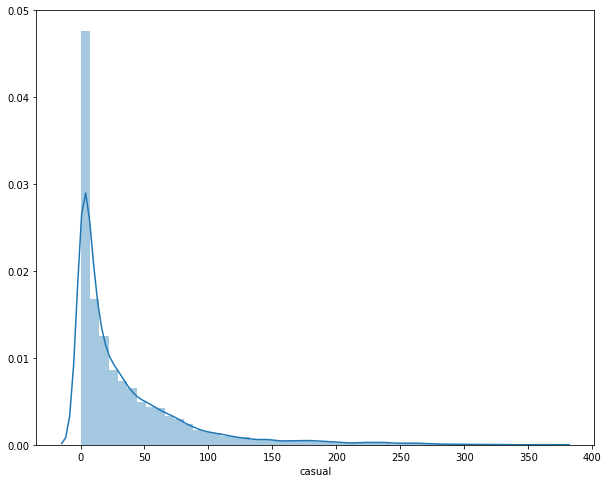

In [144]:
plt.figure(figsize=(10,8))
sns.distplot(hr_df1['casual']);

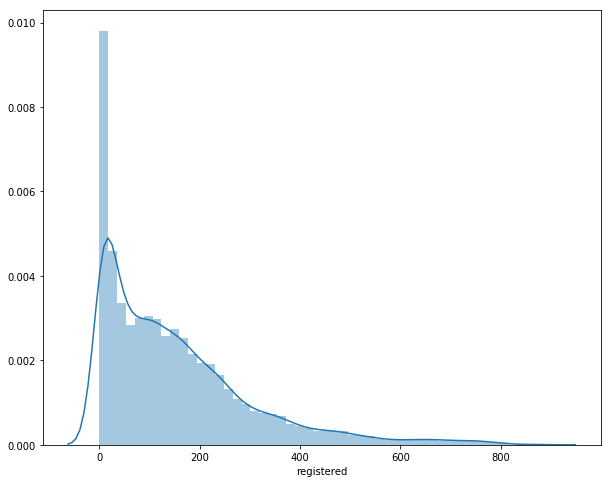

In [145]:
plt.figure(figsize=(10,8))
sns.distplot(hr_df1['registered']);

In [146]:
hr_df1.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [147]:
hr_df1['casual'] = hr_df1['casual'].transform(lambda x: x**0.5)

In [148]:
hr_df1['registered'] = hr_df1['registered'].transform(lambda x: x**0.5)

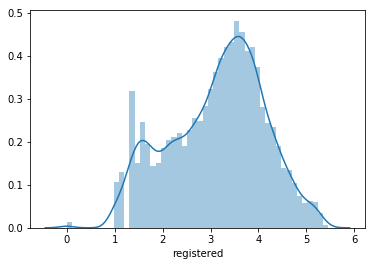

In [149]:
# hr_df1 = hr_df1.transform(lambda x: np.log(x))
sns.distplot(hr_df1['registered'].transform(lambda x: x**0.5));

In [155]:
hr_df1.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1.732051,3.605551,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,2.828427,5.656854,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,2.236068,5.196152,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,1.732051,3.162278,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.000000,1.000000,1


In [156]:
LR_trans = LinearRegression()

In [157]:
x_trans = hr_df1[['season', 'yr', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'registered']]

y_trans = hr_df1.cnt

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_trans, y_trans, test_size=0.3, random_state=2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12165, 10), (5214, 10), (12165,), (5214,))

In [158]:
LR_trans.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
print(LR_trans.score(x_train, y_train))

print(LR_trans.score(x_test, y_test))

0.9148293308593097
0.9159037567304663


In [160]:
tran_prid = LR_trans.predict(x_test)

In [161]:
mse = mean_squared_error(y_test, tran_prid)

In [162]:
np.sqrt(mse)

53.203326125795144

In [163]:
from sklearn.preprocessing import LabelEncoder

In [164]:
LE = LabelEncoder()

In [165]:
hr_df1.select_dtypes('category').columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit'],
      dtype='object')

In [166]:
for i in hr_df1.select_dtypes('category').columns:
    hr_df1[i] = LE.fit_transform(hr_df[i])

In [167]:
hr_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
dteday        17379 non-null int32
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null float64
registered    17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(6), int32(1), int64(9)
memory usage: 2.1 MB


In [168]:
from scipy.stats import zscore

In [169]:
hr_df1=hr_df1.apply(zscore)

In [170]:
LR_scale = LinearRegression()

In [174]:
x_scale = hr_df1[['season', 'yr', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'registered']]

y_scale = hr_df.cnt

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scale, test_size=0.3, random_state=2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12165, 10), (5214, 10), (12165,), (5214,))

In [176]:
LR_scale.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
print(LR_scale.score(x_train, y_train))

print(LR_scale.score(x_test, y_test))

0.9148293308593097
0.9159037567304663


In [178]:
from sklearn.metrics import mean_squared_error

In [179]:
scal_prid = LR_scale.predict(x_test)

In [180]:
mse = mean_squared_error(y_test, scal_prid)

In [181]:
np.sqrt(mse)

53.203326125795144

# 9. Apply feature engineering:

# 10. Output